In [127]:
import pandas as pd
import numpy as np

In [2]:
test2017_preds = pd.read_csv('datasets/client_results/7a_combined_model_new_arch_seq_classifier_tabular_features_10bins.csv',index_col=0)

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cleaned_loss_desc_df = pd.read_csv('hashed_cleaned_loss_desc_from_5_ipynb.csv',index_col=0)

In [4]:
cleaned_loss_desc_df.rename({'LossDescription':'CleanedLossDescription'},axis=1,inplace=True)

# Getting cleaned loss desc column for test2017 data

In [5]:
test2017_preds_cleaned = pd.merge(test2017_preds,pd.DataFrame(cleaned_loss_desc_df[['CleanedLossDescription','hashed_loss_desc_len']]),left_index=True,right_index=True)

# Analysis 1

### We will split the test2017 predictions into two parts:

#### 1) Clear Predictions - Rows having max_prob less than 30

#### 2) Unclear Predicions - Rows having max_prob more than 70

Idea is to look for factors that are affecting the model to give max_probabilities in extremities.

In [6]:
clear_test2017_preds = test2017_preds_cleaned[test2017_preds_cleaned.max_probability > 0.7]
unclear_test2017_preds = test2017_preds_cleaned[test2017_preds_cleaned.max_probability < 0.3]

# 1) Getting frequency distribution of words in clear and unclear predictions

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

### Clear Predictions

In [8]:
clear_vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")

clear_corpus = clear_test2017_preds['CleanedLossDescription']

clear_sparse_matrix = clear_vectorizer.fit_transform(clear_corpus)

In [9]:
len(clear_vectorizer.vocabulary_)

3319

In [10]:
clear_features_count = clear_sparse_matrix.sum(axis=0).tolist()[0]
clear_features_names = clear_vectorizer.get_feature_names()

clear_features = pd.DataFrame()

clear_features['feature'] = clear_features_names
clear_features['count'] = clear_features_count
clear_features = clear_features.sort_values(by='count',ascending=False)

In [74]:
clear_features['count_pct'] = clear_features['count'] / clear_test2017_preds.shape[0] * 1000

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(clear_features)

             feature  count   count_pct
739            damag   1666  261.005797
565            clean   1454  227.792574
3222           water   1320  206.799311
2488            roof   1166  182.672724
467           carpet   1143  179.069403
1672            leak   1114  174.526085
2492            room    929  145.542848
273          bedroom    649  101.676328
1489           insur    503   78.803071
3266            wind    492   77.079743
488             caus    461   72.223093
1959            need    458   71.753094
1315            hail    443   69.403102
1390            home    437   68.463105
1138           floor    425   66.583111
2190           pleas    404   63.293122
2651          shingl    400   62.666458
1718            live    382   59.846467
1612         kitchen    381   59.689801
255         bathroom    368   57.653141
1479         inspect    367   57.496475
150             area    346   54.206486
497             ceil    331   51.856494
3201            wall    309   48.409839


### Unclear Predictions

In [12]:
unclear_vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")

unclear_corpus = unclear_test2017_preds['CleanedLossDescription']

unclear_sparse_matrix = unclear_vectorizer.fit_transform(unclear_corpus)

In [13]:
len(unclear_vectorizer.vocabulary_)

10408

In [14]:
unclear_features_count = unclear_sparse_matrix.sum(axis=0).tolist()[0]
unclear_features_names = unclear_vectorizer.get_feature_names()

unclear_features = pd.DataFrame()

unclear_features['feature'] = unclear_features_names
unclear_features['count'] = unclear_features_count
unclear_features = unclear_features.sort_values(by='count',ascending=False)

In [76]:
unclear_features['count_pct'] = unclear_features['count'] / unclear_test2017_preds.shape[0] * 1000

In [77]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(unclear_features)

                 feature  count   count_pct
10046              water  81978  376.190826
2313               damag  48647  223.237394
5309                leak  46774  214.642339
5533                loss  31977  146.740028
3577               floor  25948  119.073404
7921                roof  23994  110.106647
746             basement  23976  110.024046
5431                line  22280  102.241231
7929                room  19935   91.480203
127               affect  18228   83.646910
4694               insur  16559   75.987995
1517                caus  16046   73.633877
775             bathroom  15829   72.638081
6997                pipe  15619   71.674407
5111             kitchen  15618   71.669818
4387                home  15355   70.462931
1543                ceil  15314   70.274785
9630                type  15220   69.843426
4392             homeown  14632   67.145138
6325                need  13889   63.735568
10000               wall  13023   59.761559
1464              carpet  13001 

#### Seeinng the words which are in both

In [16]:
len(set(unclear_features_names).intersection(set(clear_features_names)))

3272

As, the words in both clear and unclear predictions are almost same.  
So, let us observe the words that are in one category but not in other.

#### Seeing the words which are in clear but not in unclear

In [17]:
clear_no_unclear_words = list(set(clear_features_names) - set(unclear_features_names))

In [18]:
clear_features[clear_features.feature.isin(clear_no_unclear_words)]

,feature,count
2042,om,48
2566,scotchguard,8
1722,lkd,5
1866,microfib,5
92,ammcor,5
2565,scotch,5
514,certif,3
3160,vandel,2
2281,pudd,2
2384,rehung,2


#### Seeing the words which are in unclear but not in clear

In [19]:
unclear_no_clear_words = list(set(unclear_features_names) - set(clear_features_names))

In [20]:
unclear_features[unclear_features.feature.isin(unclear_no_clear_words)]

,feature,count
3607,fmho,1310
10318,wtr,1037
2538,descriptio,824
3105,endor,701
4399,honc,640
6127,montant,496
2183,crawford,457
7583,refd,413
9402,tn,413
3126,enregistr,411


The words in clear_no_unclear have very less counts. So, no conclusion drawn.  
The words in unclear_no_clear also don't show much significance.

#### Understanding contrast between clear and unclear in terms of word occurence count

In [78]:
all_word_counts = pd.merge(clear_features,unclear_features,left_on='feature',right_on='feature',how='outer')

In [79]:
all_word_counts.fillna(0,inplace=True)

In [80]:
all_word_counts.set_index('feature',inplace=True)

In [82]:
word_label_list = list(all_word_counts.index)

In [26]:
%matplotlib inline

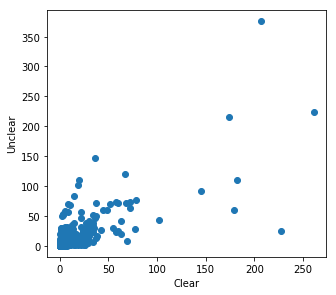

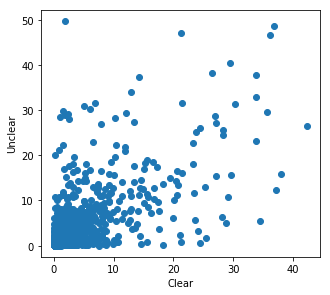

In [118]:
import matplotlib.pyplot as plt
import pylab
f, ax = plt.subplots(figsize=(5, 10))
x = all_word_counts['count_pct_x']
y = all_word_counts['count_pct_y']

plt.subplot(2,1,1)
plt.scatter(x,y)
# ax.set_xlim([.01, 2000])
# ax.set_ylim([.01, 48000])

# ax.set_yscale('log')
# ax.set_xscale('log')

# for i, txt in enumerate(word_label_list):
#     ax.annotate(txt, (x[i], y[i]),clip_on=True)
    
plt.ylabel('Unclear')
plt.xlabel('Clear')
plt.show()

f, ax = plt.subplots(figsize=(5, 10))
x1 = all_word_counts['count_pct_x'][(all_word_counts['count_pct_x']<50) & (all_word_counts['count_pct_y']<50)]
y1 = all_word_counts['count_pct_y'][(all_word_counts['count_pct_x']<50) & (all_word_counts['count_pct_y']<50)]
plt.subplot(2,1,2)
plt.scatter(x1,y1)
# ax.set_xlim([.01, 2000])
# ax.set_ylim([.01, 48000])

# ax.set_yscale('log')
# ax.set_xscale('log')

# for i, txt in enumerate(word_label_list):
#     ax.annotate(txt, (x[i], y[i]),clip_on=True)
    
plt.ylabel('Unclear')
plt.xlabel('Clear')
plt.show()

In [120]:
all_word_counts['ratio'] = all_word_counts['count_pct_x'] / all_word_counts['count_pct_y']

In [257]:
all_word_counts_sub = all_word_counts[(all_word_counts.ratio != np.inf) & (all_word_counts.ratio != 0)]
all_word_counts_sub_y = all_word_counts_sub[(all_word_counts_sub.count_pct_y >= 10)]
all_word_counts_sub_x = all_word_counts_sub[(all_word_counts_sub.count_pct_x >= 10)]
# all_word_counts_sub.sort_values(by=['ratio', 'count_x'],ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(all_word_counts_sub_x.sort_values(by=['ratio'],ascending=True))

          count_x  count_pct_x  count_y  count_pct_y      ratio
feature                                                        
homeown      66.0    10.339966  14632.0    67.145138   0.153994
affect       95.0    14.883284  18228.0    83.646910   0.177930
line        117.0    18.329939  22280.0   102.241231   0.179281
basement    127.0    19.896600  23976.0   110.024046   0.180839
loss        232.0    36.346546  31977.0   146.740028   0.247693
wet          65.0    10.183299   6165.0    28.290718   0.359952
heater       82.0    12.846624   7413.0    34.017695   0.377645
flood        91.0    14.256619   8156.0    37.427266   0.380915
descript    137.0    21.463262  12130.0    55.663650   0.385588
burst        77.0    12.063293   6406.0    29.396648   0.410363
fire        136.0    21.306596  10240.0    46.990584   0.453423
drain        66.0    10.339966   4834.0    22.182859   0.466124
drywal       86.0    13.473288   5959.0    27.345399   0.492708
pipe        236.0    36.973210  15619.0 

In [258]:
# top words correspond to those which occur most in unclear compared to clear
# bottom words correspond to those which occur most in clear compared to unclear
temp_y = all_word_counts_sub_y.sort_values(by=['ratio'],ascending=True)
temp_x = all_word_counts_sub_x.sort_values(by=['ratio'],ascending=True)
top_30_all_word_counts_sub = list(temp_y.head(30).index)
bottom_30_all_word_counts_sub = list(temp_x.tail(30).index)

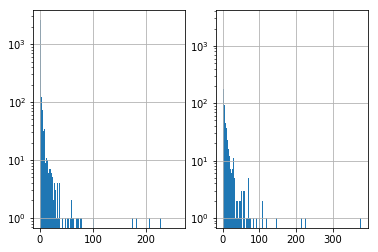

In [254]:
plt.subplot(1,2,1)
all_word_counts_sub['count_pct_x'].hist(bins = 200, log = True)

plt.subplot(1,2,2)
all_word_counts_sub['count_pct_y'].hist(bins = 150, log = True)

#### Analyzing loss description length characteristics for clear and unclear predictions

In [106]:
clear_word_len_df = pd.DataFrame(clear_test2017_preds.hashed_loss_desc_len.value_counts())

clear_word_len_df.rename({'hashed_loss_desc_len':'count'},axis=1,inplace=True)
clear_word_len_df.index.name = 'loss_desc_len'

clear_word_len_df = clear_word_len_df.reset_index()

above_14 = clear_word_len_df[clear_word_len_df['loss_desc_len'] >=14]['count'].sum()

clear_word_len_df = clear_word_len_df[clear_word_len_df['loss_desc_len'] <14]

clear_word_len_df = clear_word_len_df.append(pd.DataFrame({'loss_desc_len': [14], 'count': [above_14]}),sort=False).reset_index(drop=True)

clear_word_len_df['pct'] = (clear_word_len_df['count'] / clear_test2017_preds.shape[0]) * 100

clear_word_len_df.sort_values(by=['pct'],ascending=False)

,loss_desc_len,count,pct
0,10,795,12.454958
1,11,777,12.172959
2,9,579,9.070970
3,12,539,8.444305
4,8,520,8.146640
5,4,505,7.911640
6,3,491,7.692308
7,5,489,7.660974
8,6,436,6.830644
9,7,424,6.642645


In [107]:
unclear_word_len_df = pd.DataFrame(unclear_test2017_preds.hashed_loss_desc_len.value_counts())

unclear_word_len_df.rename({'hashed_loss_desc_len':'count'},axis=1,inplace=True)
unclear_word_len_df.index.name = 'loss_desc_len'

unclear_word_len_df = unclear_word_len_df.reset_index()

above_14 = unclear_word_len_df[unclear_word_len_df['loss_desc_len'] >=14]['count'].sum()

unclear_word_len_df = unclear_word_len_df[unclear_word_len_df['loss_desc_len'] <14]

unclear_word_len_df = unclear_word_len_df.append(pd.DataFrame({'loss_desc_len': [14], 'count': [above_14]}),sort=False).reset_index(drop=True)

unclear_word_len_df['pct'] = (unclear_word_len_df['count'] / unclear_test2017_preds.shape[0]) * 100

unclear_word_len_df.sort_values(by=['pct'],ascending=False)

,loss_desc_len,count,pct
0,11,29067,13.338626
1,10,25830,11.853191
2,12,23650,10.852806
3,13,21530,9.879954
4,9,19940,9.150315
5,8,14315,6.569045
6,2,12848,5.895850
7,5,12791,5.869693
8,4,12494,5.733402
9,3,11864,5.444300


The top 5 length values in unclear preds have 4 lengths in common with the clear preds.  
If there would have been a length(or lengths) that were contributing mostly to unclear preds would not have been present in top 5 in clear preds.  
Hence, Length of loss desc has no specific length value that gives unclear predictions 

# 2) Getting State Distribution

In [142]:
clear_states = set(clear_test2017_preds['State'].unique())

In [143]:
unclear_states = set(unclear_test2017_preds['State'].unique())

#### States which are in clear but not in unclear

In [144]:
clear_states - unclear_states

set()

No clear winner state.

#### States which are in unclear but not in clear

In [145]:
unclear_states - clear_states

{'Australian Capital Territory', 'NT', 'PE', 'WV'}

Australian Capital Territory - In Australia  
Northwest Territories(NT) - In Canada  
Prince Edward Island(PE) - In Canada  
West Virginia(WV) - In USA

In [146]:
unclear_test2017_preds.shape[0]

217916

In [147]:
unclear_test2017_preds[unclear_test2017_preds.State == 'WV'].shape[0]

220

Only 220 unclear rows of WV out of 217916 rows. So, we can ignore it.  
But the rest three are not from US. So, hypothesis 2 is somewhat giving expected results.  
Maybe, we should try building a model only on US rows.

In [148]:
total_states = set(test2017_preds['State'].unique())

#### Checking Scatter Plot of distribution of state in clear and unclear

In [149]:
clear_states_val_counts = pd.DataFrame(clear_test2017_preds['State'].value_counts())
clear_states_val_counts.rename({'State':'count'},axis=1,inplace=True)
clear_states_val_counts.index.name = 'State'
clear_states_val_counts.reset_index(inplace=True)

In [155]:
clear_states_val_counts['count_pct'] = clear_states_val_counts['count'] / clear_test2017_preds.shape[0] * 1000

In [150]:
unclear_states_val_counts = pd.DataFrame(unclear_test2017_preds['State'].value_counts())
unclear_states_val_counts.rename({'State':'count'},axis=1,inplace=True)
unclear_states_val_counts.index.name = 'State'
unclear_states_val_counts.reset_index(inplace=True)

In [156]:
unclear_states_val_counts['count_pct'] = unclear_states_val_counts['count'] / unclear_test2017_preds.shape[0] * 1000

In [158]:
all_state_counts = pd.merge(clear_states_val_counts,unclear_states_val_counts,left_on='State',right_on='State')

In [159]:
all_state_list = list(all_state_counts['State'])

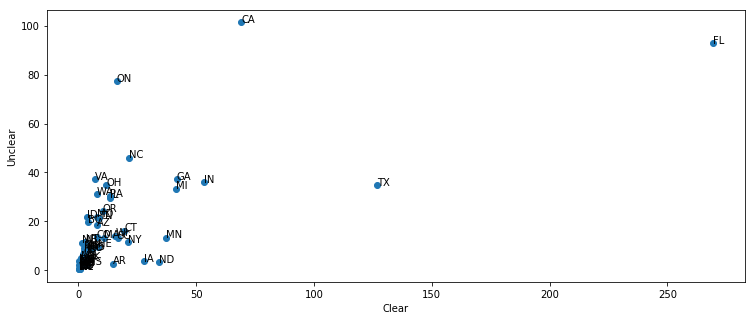

In [162]:
f, ax = plt.subplots(figsize=(12.5, 5))
x = all_state_counts['count_pct_x']
y = all_state_counts['count_pct_y']

plt.scatter(x,y)

for i, txt in enumerate(all_state_list):
    ax.annotate(txt, (x[i], y[i]))
    
plt.ylabel('Unclear')
plt.xlabel('Clear')

plt.show()

TX is the differntiating factor for clear rows(up to some extent)  
But, ON is the major differntiating factor for unclear rows.  
ON belongs to Canada and TX belongs to USA  
So, try to train model for only USA rows.

# 3) Checking Month of Claim

In [111]:
clear_month_df = pd.DataFrame(clear_test2017_preds['LossMo'].value_counts())
clear_month_df.rename({'LossMo':'count'},axis=1,inplace=True)
clear_month_df.index.name = 'LossMo'
clear_month_df.reset_index(drop=False,inplace=True)
clear_month_df['pct'] = (clear_month_df['count'] / clear_test2017_preds.shape[0]) * 100

In [112]:
clear_month_df

,LossMo,count,pct
0,6,689,10.794297
1,1,663,10.386965
2,5,654,10.245966
3,4,612,9.587968
4,3,588,9.211969
5,7,582,9.117970
6,8,540,8.459972
7,9,490,7.676641
8,2,438,6.861977
9,10,435,6.814977


In [113]:
unclear_month_df = pd.DataFrame(unclear_test2017_preds['LossMo'].value_counts())
unclear_month_df.rename({'LossMo':'count'},axis=1,inplace=True)
unclear_month_df.index.name = 'LossMo'
unclear_month_df.reset_index(drop=False,inplace=True)
unclear_month_df['pct'] = (unclear_month_df['count'] / unclear_test2017_preds.shape[0]) * 100

In [114]:
unclear_month_df

,LossMo,count,pct
0,9,20842,9.564236
1,7,20601,9.453643
2,8,19763,9.069091
3,3,19671,9.026873
4,1,19229,8.824042
5,5,18805,8.629472
6,6,18785,8.620294
7,10,17902,8.215092
8,4,17609,8.080637
9,2,15098,6.928358


No outlier month in both clear and unclear rows. So, month also doesn't affect much.

# 4) Checking CommOrRes

In [123]:
clear_commorres_df = pd.DataFrame(clear_test2017_preds.CommOrRes.value_counts())
clear_commorres_df.rename({'CommOrRes':'count'},axis=1,inplace=True)
clear_commorres_df.index.name = 'CommOrRes'
clear_commorres_df.reset_index(drop=False,inplace=True)
clear_commorres_df['pct'] = (clear_commorres_df['count'] / clear_test2017_preds.shape[0]) * 100

In [124]:
clear_commorres_df

,CommOrRes,count,pct
0,Residential,5677,88.939370
1,Commercial,506,7.927307
2,Other,200,3.133323


In [125]:
unclear_commorres_df = pd.DataFrame(unclear_test2017_preds.CommOrRes.value_counts())
unclear_commorres_df.rename({'CommOrRes':'count'},axis=1,inplace=True)
unclear_commorres_df.index.name = 'CommOrRes'
unclear_commorres_df.reset_index(drop=False,inplace=True)
unclear_commorres_df['pct'] = (unclear_commorres_df['count'] / unclear_test2017_preds.shape[0]) * 100

In [126]:
unclear_commorres_df

,CommOrRes,count,pct
0,Residential,185123,84.951541
1,Commercial,17778,8.158189
2,Other,15015,6.890270


CommOrRess also has nearly same distribution in both.

# 4) Checking PolicyHolderType

In [128]:
clear_PolicyHolderType_df = pd.DataFrame(clear_test2017_preds.PolicyHolderType.value_counts())
clear_PolicyHolderType_df.rename({'PolicyHolderType':'count'},axis=1,inplace=True)
clear_PolicyHolderType_df.index.name = 'PolicyHolderType'
clear_PolicyHolderType_df.reset_index(drop=False,inplace=True)
clear_PolicyHolderType_df['pct'] = (clear_PolicyHolderType_df['count'] / clear_test2017_preds.shape[0]) * 100

In [129]:
clear_PolicyHolderType_df

,PolicyHolderType,count,pct
0,Individual,5260,82.406392
1,Company,1123,17.593608


In [130]:
unclear_PolicyHolderType_df = pd.DataFrame(unclear_test2017_preds.PolicyHolderType.value_counts())
unclear_PolicyHolderType_df.rename({'PolicyHolderType':'count'},axis=1,inplace=True)
unclear_PolicyHolderType_df.index.name = 'PolicyHolderType'
unclear_PolicyHolderType_df.reset_index(drop=False,inplace=True)
unclear_PolicyHolderType_df['pct'] = (unclear_PolicyHolderType_df['count'] / unclear_test2017_preds.shape[0]) * 100

In [131]:
unclear_PolicyHolderType_df

,PolicyHolderType,count,pct
0,Individual,191439,87.849905
1,Company,26477,12.150095


PolicyHolderType also has nearly same distribution in both.

# 5) Checking Display Name

In [164]:
clear_DisplayName_df = pd.DataFrame(clear_test2017_preds.DisplayName.value_counts())
clear_DisplayName_df.rename({'DisplayName':'count'},axis=1,inplace=True)
clear_DisplayName_df.index.name = 'DisplayName'
clear_DisplayName_df.reset_index(drop=False,inplace=True)
clear_DisplayName_df['pct'] = (clear_DisplayName_df['count'] / clear_test2017_preds.shape[0]) * 1000

In [165]:
clear_DisplayName_df

,DisplayName,count,pct
0,Consulting,2145,336.048880
1,Default,1547,242.362525
2,Carpet Cleaning,1503,235.469215
3,Structural Repairs,407,63.763121
4,Temporary Services,367,57.496475
5,Water Mitigation,165,25.849914
6,Contents,88,13.786621
7,BioHazard,51,7.989973
8,Res-Com Services,27,4.229986
9,Janitorial,23,3.603321


In [166]:
unclear_DisplayName_df = pd.DataFrame(unclear_test2017_preds.DisplayName.value_counts())
unclear_DisplayName_df.rename({'DisplayName':'count'},axis=1,inplace=True)
unclear_DisplayName_df.index.name = 'DisplayName'
unclear_DisplayName_df.reset_index(drop=False,inplace=True)
unclear_DisplayName_df['pct'] = (unclear_DisplayName_df['count'] / unclear_test2017_preds.shape[0]) * 1000

In [167]:
unclear_DisplayName_df

,DisplayName,count,pct
0,Water Mitigation,96463,442.661392
1,Structural Repairs,50902,233.585418
2,Default,36557,167.757301
3,Contents,10756,49.358468
4,Mold Remediation,10709,49.142789
5,Temporary Services,4391,20.149966
6,Structural Cleaning,3284,15.070027
7,Fire Damage,1129,5.180895
8,Res-Com Services,1048,4.809193
9,BioHazard,960,4.405367


DisplayNames like Water Mitigation and Structural Repairs are major participants in unclear rows.

#### Checking distribution of Display Name using Scatter Plot

In [168]:
all_display_name_counts = pd.merge(clear_DisplayName_df,unclear_DisplayName_df,left_on='DisplayName',right_on='DisplayName')

In [169]:
all_display_name_list = list(all_display_name_counts['DisplayName'])

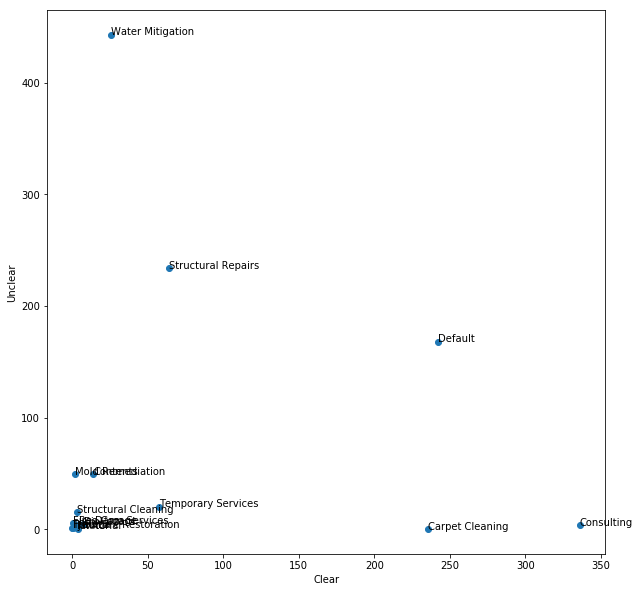

In [171]:
f, ax = plt.subplots(figsize=(10, 10))
x = all_display_name_counts['pct_x']
y = all_display_name_counts['pct_y']

plt.scatter(x,y)

for i, txt in enumerate(all_display_name_list):
    ax.annotate(txt, (x[i], y[i]))
    
plt.ylabel('Unclear')
plt.xlabel('Clear')

plt.show()

Water Mitigation is the outlier and it accounts mostly to unclear predictions

In [183]:
all_display_name_counts['ratio'] = all_display_name_counts['pct_x'] / all_display_name_counts['pct_y']
all_display_name_counts.sort_values(by=['ratio'],ascending=True)

,DisplayName,count_x,pct_x,count_y,pct_y,ratio
12,Mold Remediation,13,2.036660,10709,49.142789,0.041444
5,Water Mitigation,165,25.849914,96463,442.661392,0.058397
13,Fire Damage,3,0.469998,1129,5.180895,0.090718
15,Trauma,1,0.156666,326,1.495989,0.104724
11,Structural Cleaning,20,3.133323,3284,15.070027,0.207918
14,Furniture Restoration,2,0.313332,280,1.284899,0.243858
3,Structural Repairs,407,63.763121,50902,233.585418,0.272976
6,Contents,88,13.786621,10756,49.358468,0.279316
8,Res-Com Services,27,4.229986,1048,4.809193,0.879563
1,Default,1547,242.362525,36557,167.757301,1.444721


#### Towards Unclear: 
Mold Remediation and Water Mitigation  
#### Towards clear: 
Carpet Cleaning and Consulting

# 6) Checking Division Name

In [189]:
clear_DivisionName_df = pd.DataFrame(clear_test2017_preds.DivisionName.value_counts())
clear_DivisionName_df.rename({'DivisionName':'count'},axis=1,inplace=True)
clear_DivisionName_df.index.name = 'DivisionName'
clear_DivisionName_df.reset_index(drop=False,inplace=True)
clear_DivisionName_df['pct'] = (clear_DivisionName_df['count'] / clear_test2017_preds.shape[0]) * 1000

In [190]:
clear_DivisionName_df

,DivisionName,count,pct
0,Carpet Cleaning,1287,201.629328
1,Inspections,1102,172.646091
2,TX Inspections,606,94.939684
3,Plumbing,576,90.239699
4,Service Work,243,38.069873
5,Inspection,201,31.489895
6,Non-Restoration Cleaning Services,161,25.223249
7,Res/Com Services,139,21.776594
8,Leak Detection,135,21.149930
9,Consulting,112,17.546608


In [191]:
unclear_DivisionName_df = pd.DataFrame(unclear_test2017_preds.DivisionName.value_counts())
unclear_DivisionName_df.rename({'DivisionName':'count'},axis=1,inplace=True)
unclear_DivisionName_df.index.name = 'DivisionName'
unclear_DivisionName_df.reset_index(drop=False,inplace=True)
unclear_DivisionName_df['pct'] = (unclear_DivisionName_df['count'] / unclear_test2017_preds.shape[0]) * 1000

In [192]:
unclear_DivisionName_df

,DivisionName,count,pct
0,Water Mitigation,46278,212.366233
1,Mitigation/Emergency,21271,97.611006
2,Reconstruction,19306,88.593770
3,Structure,13765,63.166541
4,Structural Repairs,7101,32.585951
5,Contents,6390,29.323225
6,Water Mitigation,5574,25.578663
7,Reconstruction and General Contracting,5272,24.192808
8,Emergency Services and Mitigation,4987,22.884965
9,Mold Remediation,4814,22.091081


Water Mitigation is here also a major participant in unclear rows.

#### Checking distribution of Division Name using Scatter Plot

In [193]:
all_Division_name_counts = pd.merge(clear_DivisionName_df,unclear_DivisionName_df,left_on='DivisionName',right_on='DivisionName')

In [196]:
all_Division_name_list = list(all_Division_name_counts['DivisionName'])

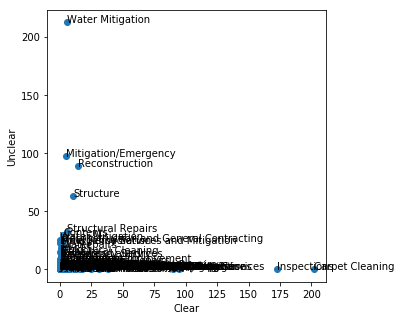

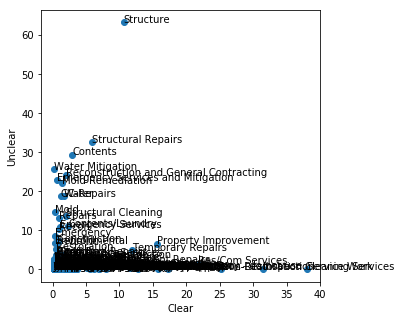

In [235]:
f, ax = plt.subplots(figsize=(5, 5))
x = all_Division_name_counts['pct_x']
y = all_Division_name_counts['pct_y']
plt.scatter(x,y)

for i, txt in enumerate(all_Division_name_list):
    ax.annotate(txt, (x[i], y[i]))
    
plt.ylabel('Unclear')
plt.xlabel('Clear')

plt.show()



# Subset

all_Division_name_sub = all_Division_name_counts[(all_Division_name_counts['pct_x'] < 45) & (all_Division_name_counts['pct_y'] < 75)]

all_Division_name_list_sub= list(all_Division_name_sub['DivisionName'])

f, ax = plt.subplots(figsize=(5, 5))
x = temp1['pct_x'].reset_index(drop=True)
y = temp1['pct_y'].reset_index(drop=True)

plt.scatter(x,y)

for i, txt in enumerate(all_Division_name_list_sub):
    ax.annotate(txt, (x[i], y[i]))
    
plt.ylabel('Unclear')
plt.xlabel('Clear')

plt.show()

In [239]:
all_Division_name_counts['ratio'] = all_Division_name_counts['pct_x'] / all_Division_name_counts['pct_y']

                               DivisionName  count_x       pct_x  count_y  \
116                       Water Mitigation         1    0.156666     5574   
93                                     Mold        2    0.313332     3173   
68        Emergency Services and Mitigation        4    0.626665     4987   
22                         Water Mitigation       38    5.953313    46278   
95                                Emergency        2    0.313332     1885   
89                            Environmental        2    0.313332     1455   
24                     Mitigation/Emergency       33    5.169983    21271   
162                   Residential Structure        1    0.156666      576   
50                         Mold Remediation        9    1.409995     4814   
160                            Water/Sewage        1    0.156666      524   
53                               GC-Repairs        8    1.253329     4102   
59                                  Repairs        6    0.939997     2866   

In [244]:
pd.set_option('display.max_rows', None)

In [248]:
all_Division_name_counts_temp = all_Division_name_counts[['DivisionName','pct_x','pct_y','ratio']].sort_values(by=['ratio'],ascending=True)

In [249]:
all_Division_name_counts_temp[(all_Division_name_counts_temp['pct_y'] > 25) & (all_Division_name_counts_temp['ratio'] < 1)]

,DivisionName,pct_x,pct_y,ratio
116,Water Mitigation,0.156666,25.578663,0.006125
22,Water Mitigation,5.953313,212.366233,0.028033
24,Mitigation/Emergency,5.169983,97.611006,0.052965
33,Contents,2.976657,29.323225,0.101512
12,Reconstruction,14.726618,88.593770,0.166226
16,Structure,10.653298,63.166541,0.168654
21,Structural Repairs,5.953313,32.585951,0.182696


#### Towards Unclear:  
    Water Mitigation  
    Mitigation/Emergency  
    Contents  
    Reconstruction  
    Structure  
    Structural Repairs

In [251]:
all_Division_name_counts_temp

,DivisionName,pct_x,pct_y,ratio
116,Water Mitigation,0.156666,25.578663,0.006125
93,Mold,0.313332,14.560656,0.021519
68,Emergency Services and Mitigation,0.626665,22.884965,0.027383
22,Water Mitigation,5.953313,212.366233,0.028033
95,Emergency,0.313332,8.650122,0.036223
89,Environmental,0.313332,6.676885,0.046928
24,Mitigation/Emergency,5.169983,97.611006,0.052965
162,Residential Structure,0.156666,2.643220,0.059271
50,Mold Remediation,1.409995,22.091081,0.063826
160,Water/Sewage,0.156666,2.404596,0.065153


#### Towards Clear:  
    Inspections
    Carpet Cleaning
    Service Work
    Non-Restoration Cleaning Services
    TX Inspections
    Inspection
    Plumbing